In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img

In [2]:
!pip install split-folders
import splitfolders
splitfolders.ratio('C:/Users/SRAVYA/Downloads/Dataset', output="output", seed=1345, ratio=(.8, 0.1,0.1)) 

Defaulting to user installation because normal site-packages is not writeable


Copying files: 6400 files [00:12, 492.62 files/s]


In [3]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
'C:/Users/SRAVYA/Downloads/output/train',seed=123,image_size=(IMG_HEIGHT, IMG_WIDTH),batch_size=64)

test_ds = tf.keras.preprocessing.image_dataset_from_directory('C:/Users/SRAVYA/Downloads/output/test',seed=123,image_size=(IMG_HEIGHT, IMG_WIDTH),batch_size=64)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
'C:/Users/SRAVYA/Downloads/output/val',
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

Found 5430 files belonging to 4 classes.
Found 6400 files belonging to 4 classes.
Found 6400 files belonging to 4 classes.


In [4]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

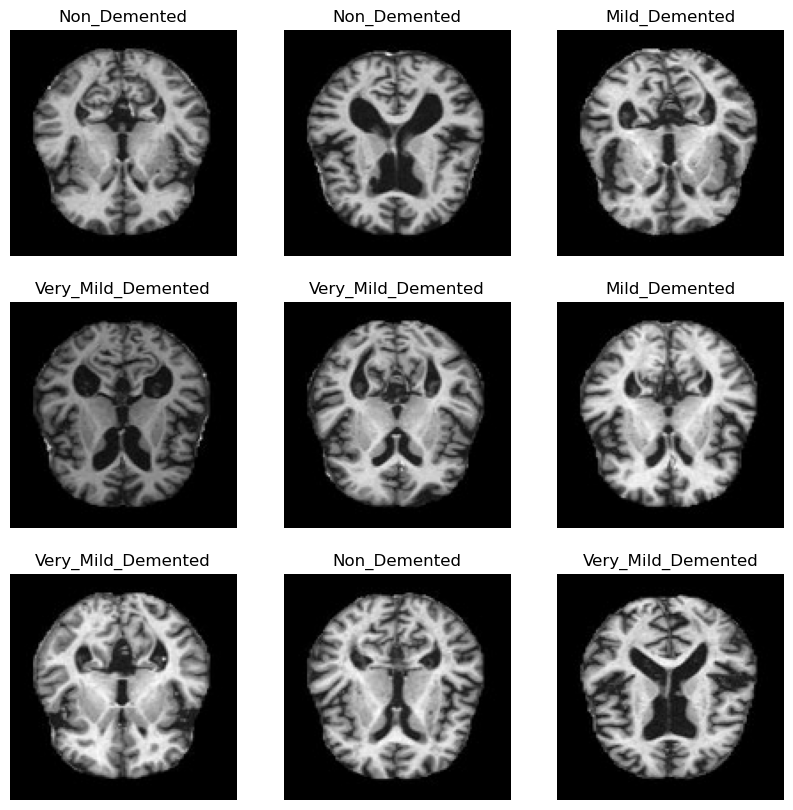

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<function matplotlib.pyplot.show(close=None, block=None)>

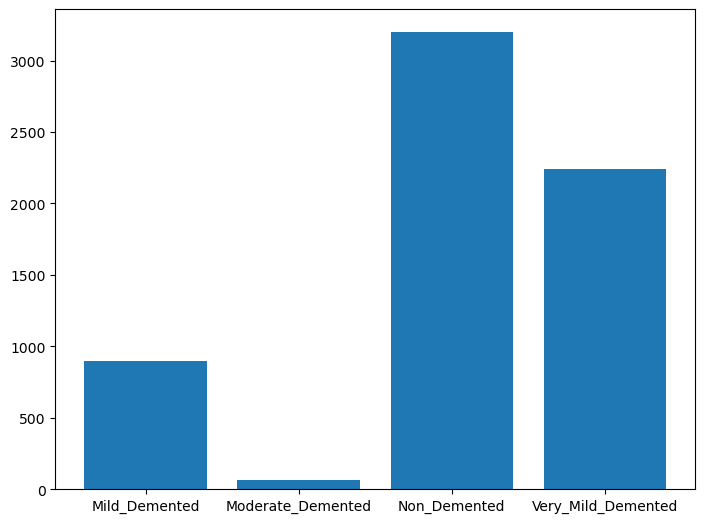

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = [896,64,3200,2240]
ax.bar(class_names,size)
plt.show

In [7]:
model = keras.models.Sequential()#CNN Sequential Model
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0

In [10]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=36, batch_size=64, verbose=1)

Epoch 1/36


85/85 [==============================] - 43s 472ms/step - loss: 1.4562 - accuracy: 0.5210 - val_loss: 1.0779 - val_accuracy: 0.5263
Epoch 2/36
85/85 [==============================] - 41s 480ms/step - loss: 0.8904 - accuracy: 0.5899 - val_loss: 0.9674 - val_accuracy: 0.5645
Epoch 3/36
85/85 [==============================] - 40s 470ms/step - loss: 0.8121 - accuracy: 0.6306 - val_loss: 0.8674 - val_accuracy: 0.6027
Epoch 4/36
85/85 [==============================] - 40s 469ms/step - loss: 0.7459 - accuracy: 0.6687 - val_loss: 0.8192 - val_accuracy: 0.6552
Epoch 5/36
85/85 [==============================] - 40s 469ms/step - loss: 0.6904 - accuracy: 0.7006 - val_loss: 0.8062 - val_accuracy: 0.6836
Epoch 6/36
85/85 [==============================] - 40s 468ms/step - loss: 0.5977 - accuracy: 0.7506 - val_loss: 0.7041 - val_accuracy: 0.7128
Epoch 7/36
85/85 [==============================] - 40s 469ms/step - loss: 0.5289 - accuracy: 0.7847 - val_loss: 0.7363 - val_accuracy: 0.73

In [11]:
 get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

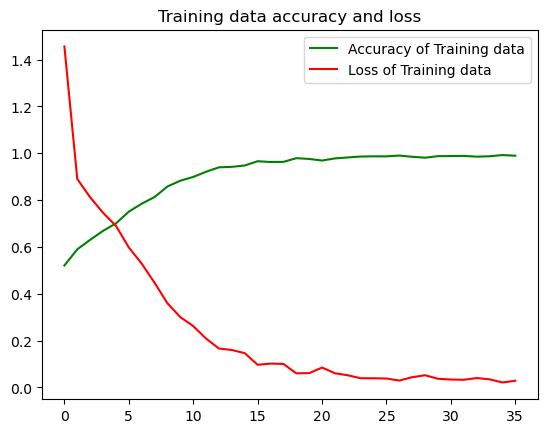

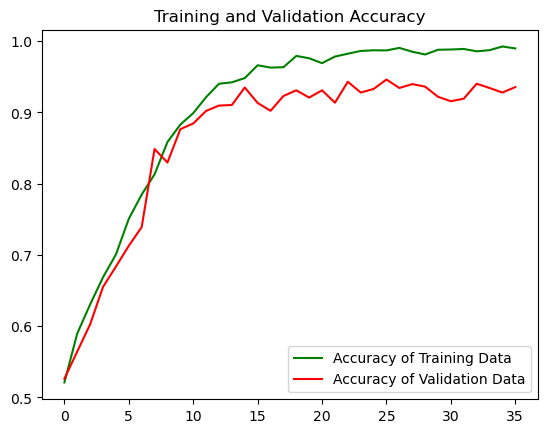

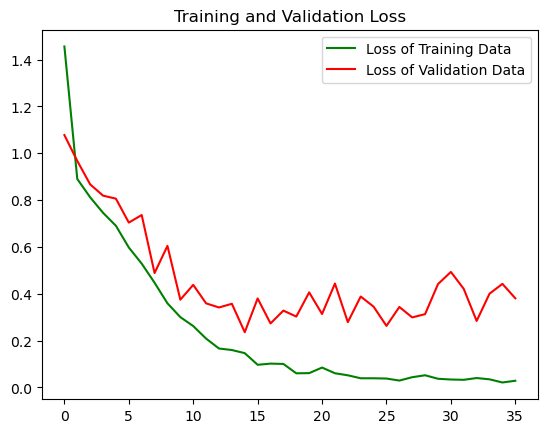

<Figure size 640x480 with 0 Axes>

In [12]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [13]:
loss, accuracy = model.evaluate(test_ds)

100/100 [==============================] - 11s 104ms/step - loss: 0.3809 - accuracy: 0.9355


1/1 [==============================] - 0s 31ms/step


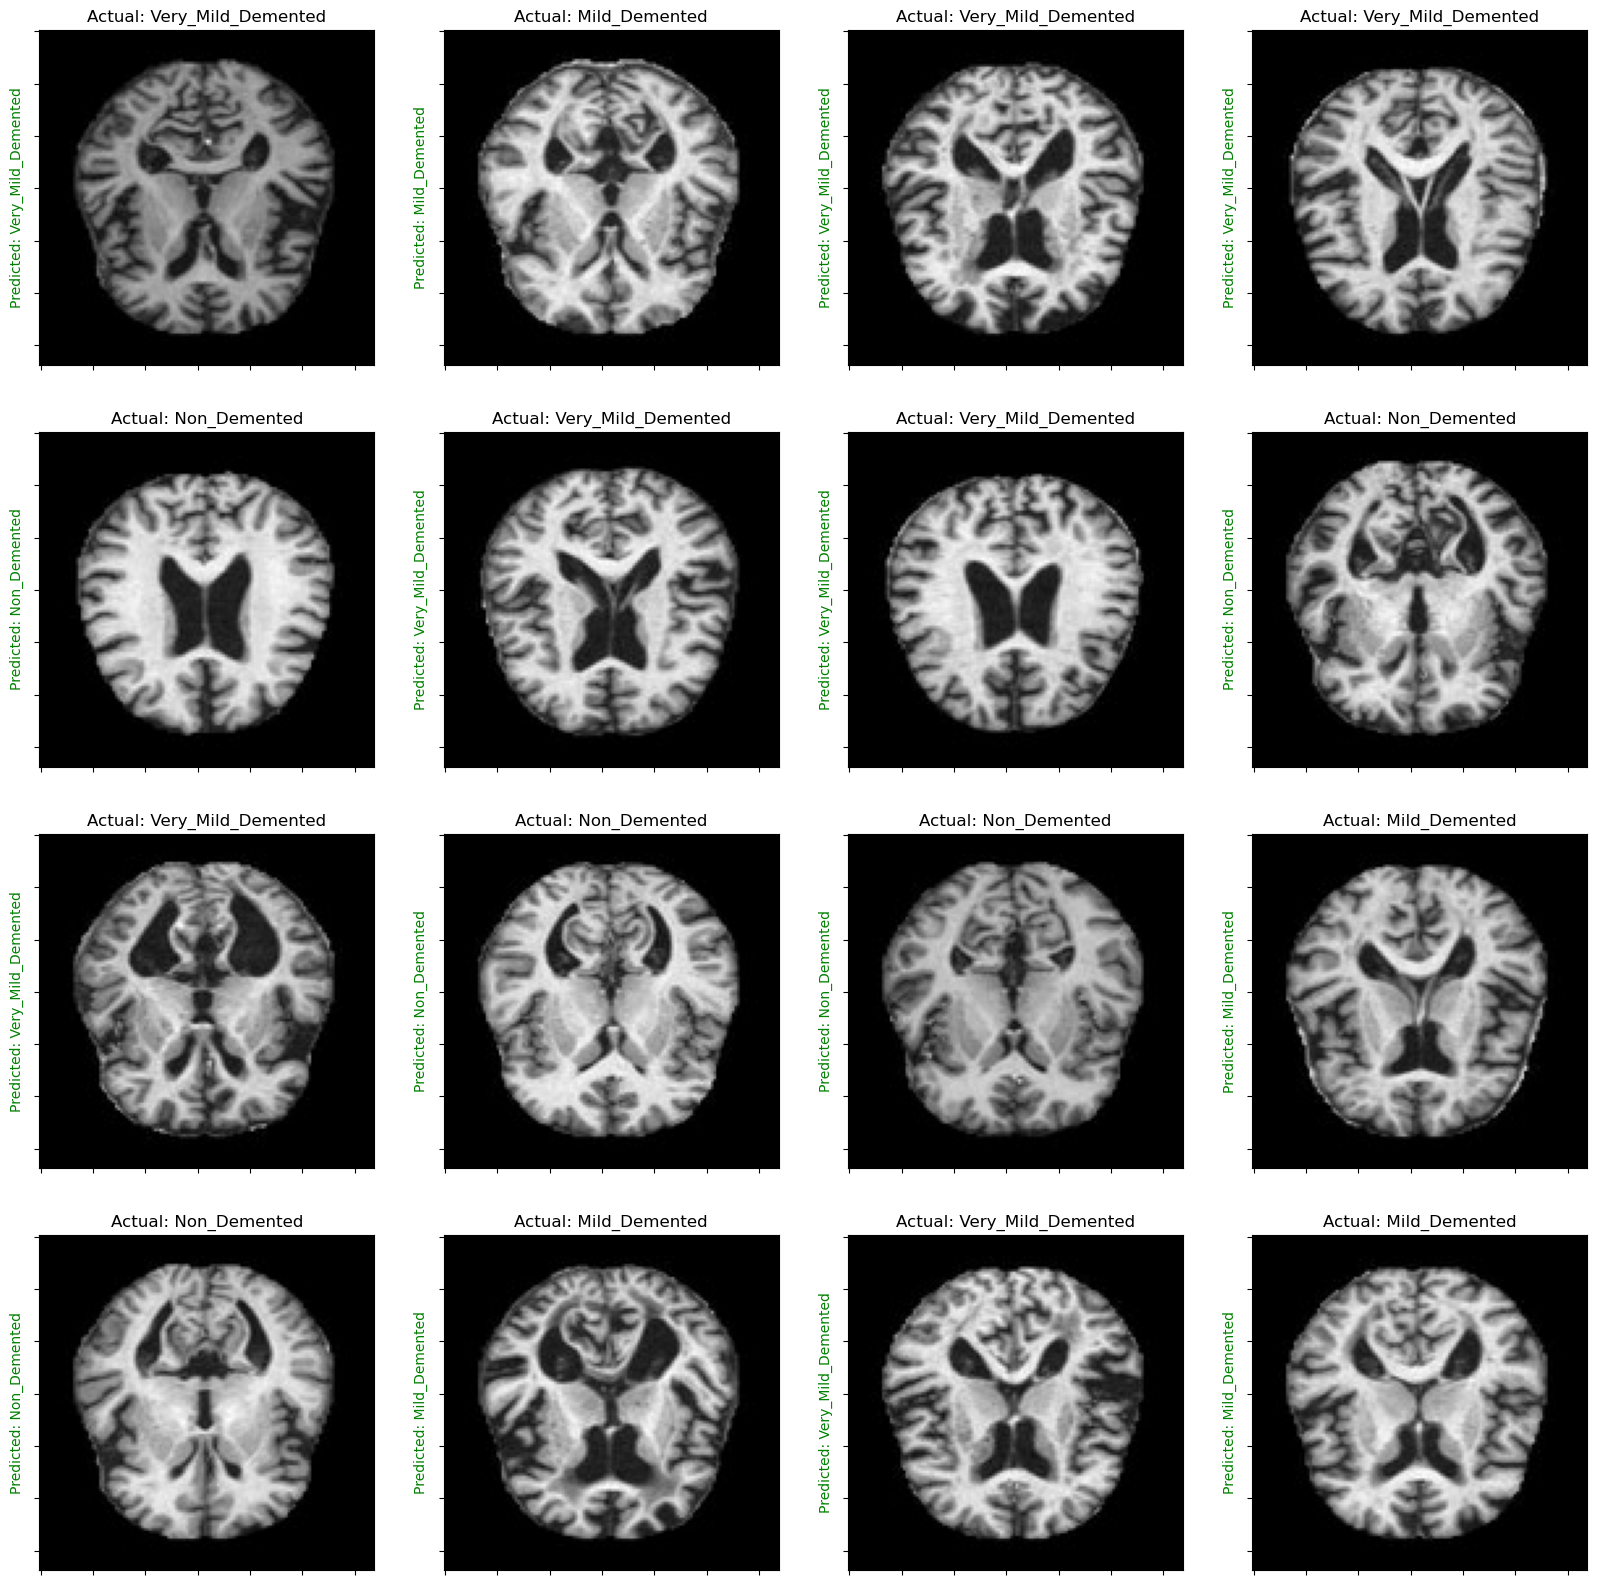

In [14]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

In [15]:
pred_labels = model.predict(test_ds)

100/100 [==============================] - 11s 102ms/step


In [16]:
from keras.preprocessing.image import load_img, img_to_array

def predict_alzheimers(image_path, model, class_names, img_height=128, img_width=128):
    # Load the image
    img = load_img(image_path, target_size=(img_height, img_width))
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Scale the image array (if necessary, depending on your model's training)
    img_array = img_array / 255.0

    # Expand dimensions to fit model expected input
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    # Retrieve the most likely prediction
    predicted_class = class_names[np.argmax(score)]

    # Return the result
    return predicted_class

# Example usage
image_path = 'C:/Users/SRAVYA/Downloads/output/test/Mild_Demented/mild_4.jpg'
prediction = predict_alzheimers(image_path, model, class_names)
print(f"This image is most likely: {prediction}")


1/1 [==============================] - 0s 31ms/step
This image is most likely: Very_Mild_Demented


2/2 [==============================] - 0s 46ms/step


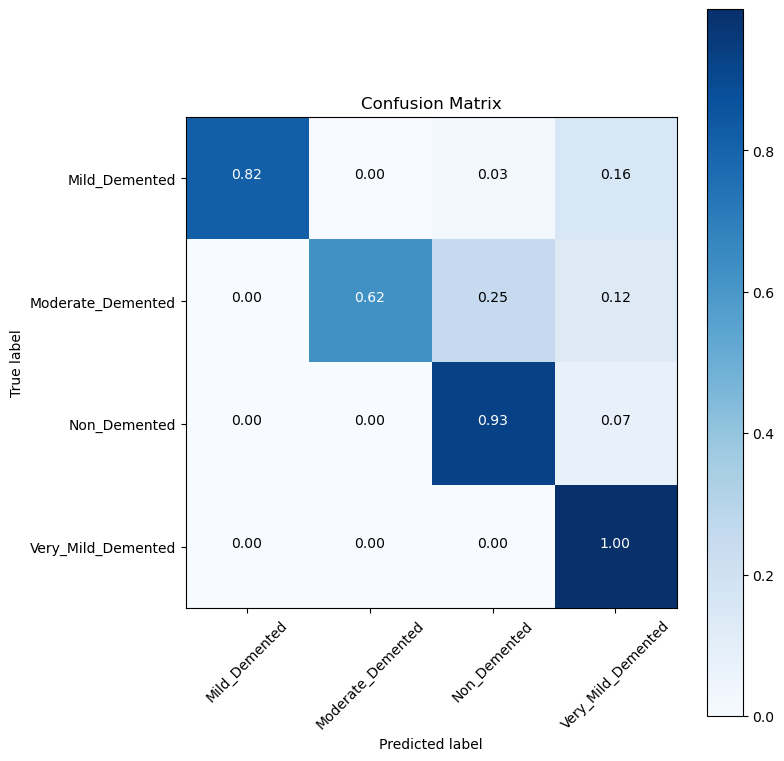

In [17]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Getting actual and predicted labels
actual_labels = []
predicted_labels = []
for images, labels in test_ds:
    preds = model.predict(images)
    preds = np.argmax(preds, axis=1)
    actual_labels.extend(labels)
    predicted_labels.extend(preds)

# Generating the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

# Plotting the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Labeling the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]:.2f}",
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

1/1 [==============================] - 0s 106ms/step


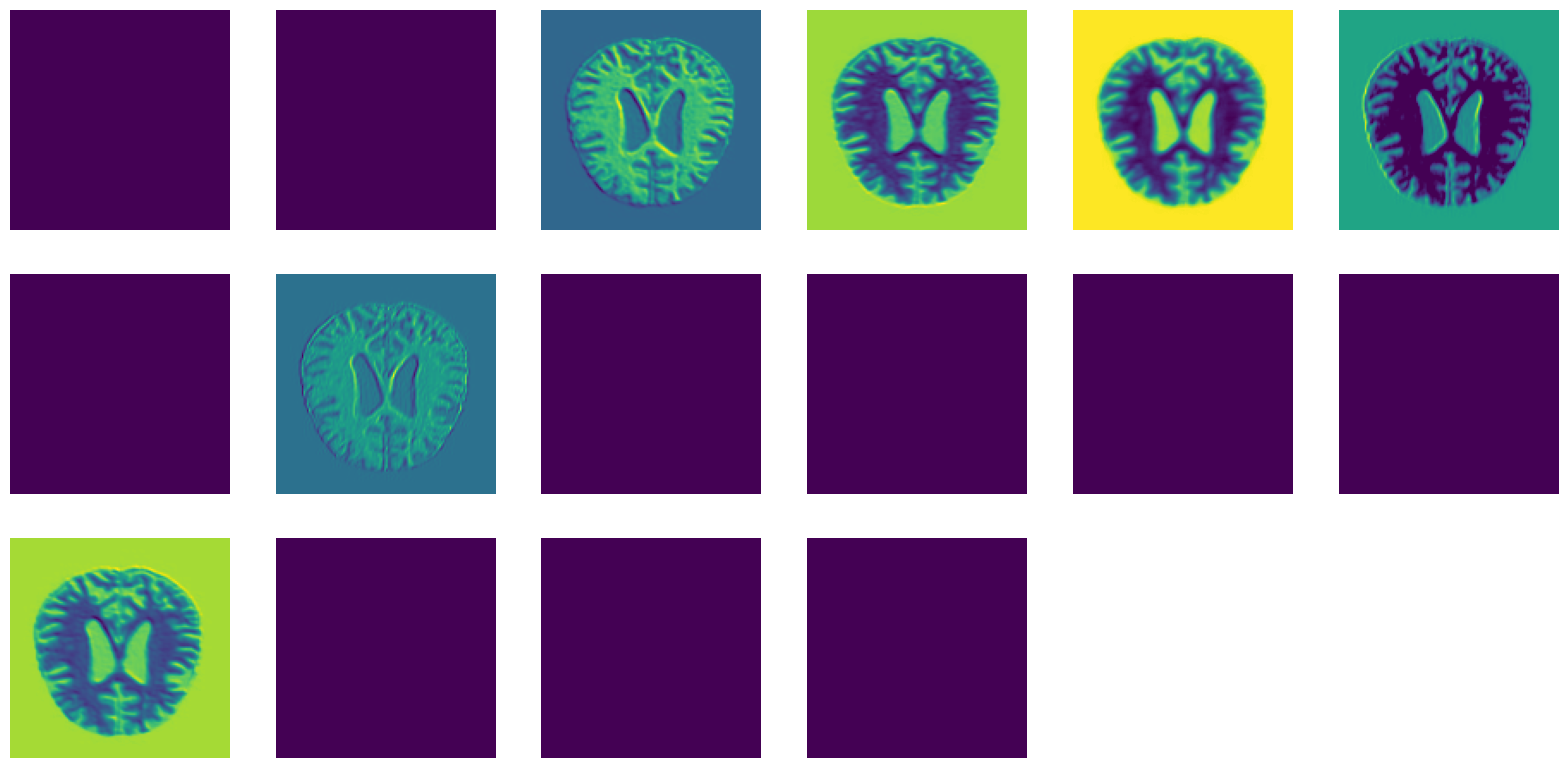

In [18]:
# Assuming 'model' is your trained CNN model
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Choose an image to visualize
img_path = 'C:/Users/SRAVYA/Downloads/Dataset/Moderate_Demented/moderate_11.jpg'
img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Get feature maps
activations = activation_model.predict(img_array)

# Plotting feature maps for the first conv layer
first_layer_activation = activations[0]
plt.figure(figsize=(20, 20))
for i in range(first_layer_activation.shape[-1]):
    plt.subplot(6, 6, i + 1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()

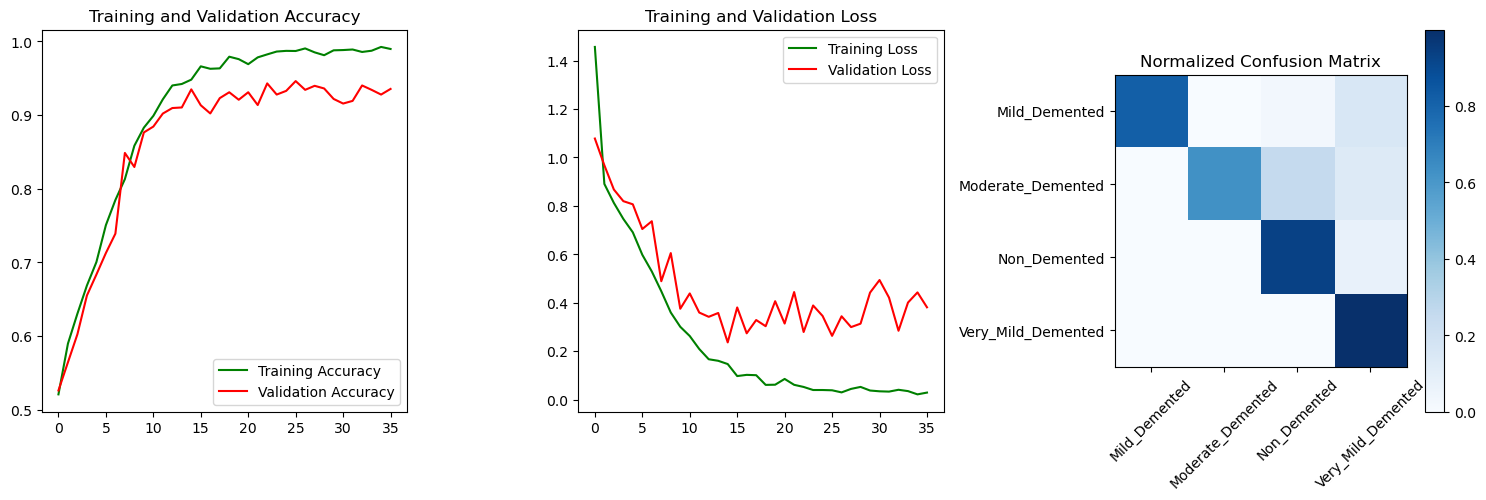

1/1 [==============================] - 0s 95ms/step


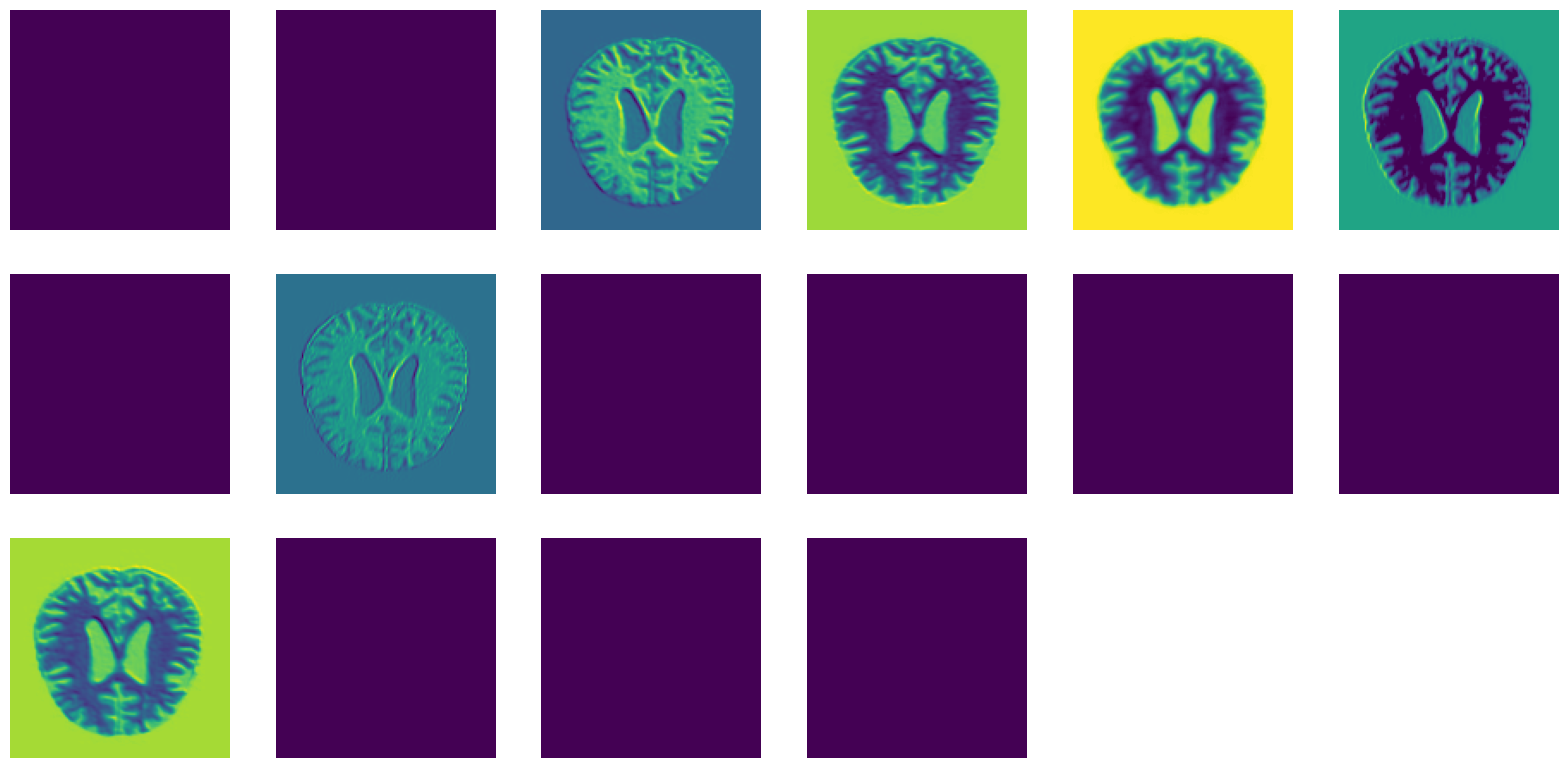

In [19]:
# Visualization for training history
plt.figure(figsize=(15, 5))

# Training and validation accuracy
plt.subplot(1, 3, 1)
plt.plot(epochs, get_ac, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')

# Training and validation loss
plt.subplot(1, 3, 2)
plt.plot(epochs, get_los, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')

# Confusion Matrix
plt.subplot(1, 3, 3)
cm = confusion_matrix(actual_labels, predicted_labels, normalize='true')
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()

plt.show()

# Visualization for feature maps
# Assuming 'model' is your trained CNN model
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Choose an image to visualize
img_path = 'C:/Users/SRAVYA/Downloads/Dataset/Moderate_Demented/moderate_11.jpg'
img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Get feature maps
activations = activation_model.predict(img_array)

# Plotting feature maps for the first conv layer
first_layer_activation = activations[0]
plt.figure(figsize=(20, 20))
for i in range(first_layer_activation.shape[-1]):
    plt.subplot(6, 6, i + 1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()

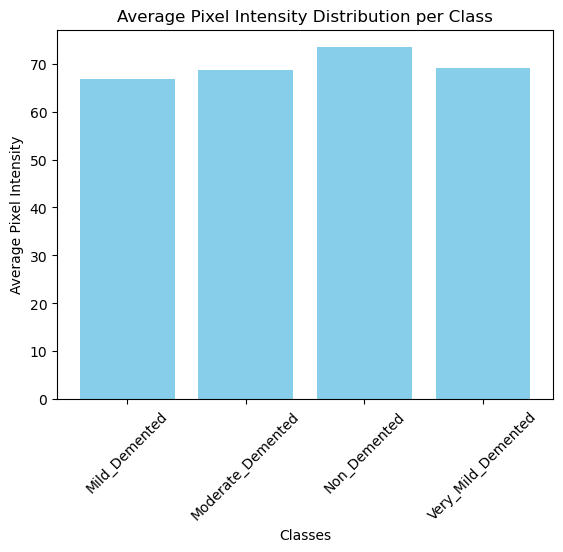

In [23]:
def plot_pixel_intensity_distribution(dataset, class_names):
    avg_intensity = []
    for label in range(len(class_names)):
        images = [x[0].numpy() for x in dataset.unbatch().filter(lambda x, y: y == label)]
        if images:
            avg_intensity.append(np.mean(images))
        else:
            avg_intensity.append(0)

    plt.bar(class_names, avg_intensity, color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Average Pixel Intensity')
    plt.title('Average Pixel Intensity Distribution per Class')
    plt.xticks(rotation=45)
    plt.show()

plot_pixel_intensity_distribution(train_ds, class_names)


1/1 [==============================] - 0s 28ms/step


C:\Users\SRAVYA\AppData\Local\Temp\ipykernel_11024\2440789218.py:12: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()
C:\Users\SRAVYA\AppData\Local\Temp\ipykernel_11024\2440789218.py:15: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0, 255).astype('uint8')


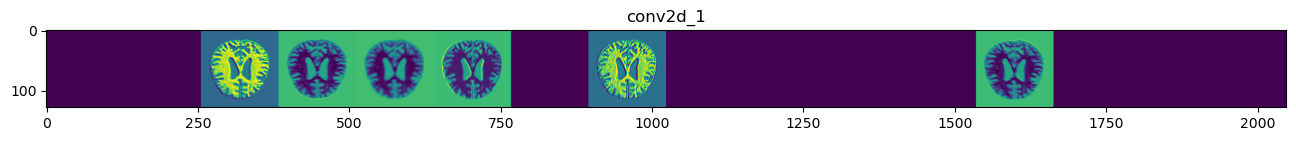

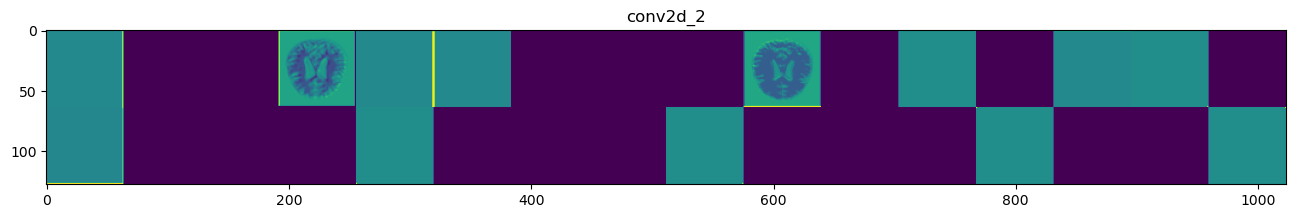

In [24]:
def plot_feature_maps(activation_model, img_array, layer_names):
    activations = activation_model.predict(img_array)
    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // 16
        display_grid = np.zeros((size * n_cols, size * 16))
        for col in range(n_cols):
            for row in range(16):
                channel_image = layer_activation[0, :, :, col * 16 + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

plot_feature_maps(activation_model, img_array, ['conv2d_1', 'conv2d_2'])  # replace with your layer names

In [1]:
import matplotlib.pyplot as plt

def plot_learning_rate_vs_loss(learning_rates, losses):
    plt.figure(figsize=(10, 6))
    plt.semilogx(learning_rates, losses)
    plt.xlabel("Learning Rate")
    plt.ylabel("Loss")
    plt.title("Learning Rate vs. Loss")
    plt.show()

# learning_rates and losses should be recorded during training
plot_learning_rate_vs_loss(learning_rates, losses)

NameError: name 'learning_rates' is not defined